# Detecção de Fraude de Cartão de Crédito - Regressão Logística


O projeto tem como objetivo identificar transações fraudulentas no serviço de cartão de crédito de seus clientes utilizando algoritmo de regressão logística. Para isso, foi selecionado um conjunto de dados que contém transações efetuadas com cartões de crédito durante dois dias do mes de setembro de 2013 por titulares de cartões europeus. No total, foram 284.807 transações analisadas.

A base de dados contém apenas variáveis ​​de entrada numéricas que são o resultado de uma transformação PCA, sendo as variáveis V1, V2,… V28. As únicas variáveis que não foram transformadas são 'Time' e 'Amount'.

**Time**: segundos decorridos entre cada transação e a primeira transação no conjunto de dados.\
**Amount**: valor total da transação.\
**Class (variável resposta)**: assume valor 1 em caso de fraude e 0 caso contrário.

Além disso, por conta das questões de confidencialidade, não foi possível trazer os valores originais e nomes originais das variáveis.

Link para Base de Dados no Kaggle: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Nomalizacao
from sklearn.preprocessing import RobustScaler


ModuleNotFoundError: No module named 'sklearn'

In [3]:
creditcard = pd.read_csv("C:/Users/Cliente/OneDrive/Profissional/Projetos ML/Classificação/creditcard.csv", sep=',')
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
creditcard.columns # nome das variaveis

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
def null_values(creditcard):
    null_count = creditcard.isnull().sum()
    
    if null_count.any():
        nulos = creditcard[creditcard.isnull()]
        return nulos
    else:
        return "Não há nulos"

null_values(creditcard)

'Não há nulos'

In [6]:
creditcard.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


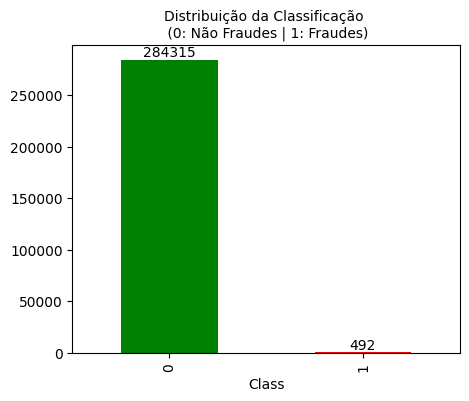

In [7]:
cores = ['green', 'red']

ordem = [0, 1]  # Defina a ordem desejada
contagem_fraude = creditcard['Class'].value_counts().reindex(ordem)

plt.figure(figsize=(5, 4))
barras = contagem_fraude.plot.bar(color=cores)
plt.title('Distribuição da Classificação \n (0: Não Fraudes | 1: Fraudes)', fontsize=10)

# Adicionando rótulos em cima de cada barra
for barra in barras.patches:
    y = barra.get_height()
    x = barra.get_x() + barra.get_width() / 2
    plt.text(x, y, f'{y}', ha='center', va='bottom')

# Mostrando o gráfico
plt.show()

In [9]:
print('Não Fraudes:',creditcard['Class'].value_counts()[0], '(', round(creditcard['Class'].value_counts()[0]/len(creditcard)*100,2), '% )')
print('Fraudes:', creditcard['Class'].value_counts()[1], '(', round(creditcard['Class'].value_counts()[1]/len(creditcard)*100,2), '% )')

Não Fraudes: 284315 ( 99.83 % )
Fraudes: 492 ( 0.17 % )


Como base na contagem de registros, vemos que existe um desbalanceamento entre as classes, sendo que apenas 0.17% (492 transações) da base está classificada como fraude e os outros 99.83% (284.315 transações) como não fraude. Para isso, será necessário realizar um balanceamento para que o algoritmo treinado nos retorne indícios de fraude, caso contrário assumirá que a maioria das transações não são fraudes (Overfitting).

## Análise Exploratória dos Dados (AED)

In [10]:
creditcard.groupby(['Class'])['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


Text(0.5, 1.0, 'Boxplot do Valor das Transações')

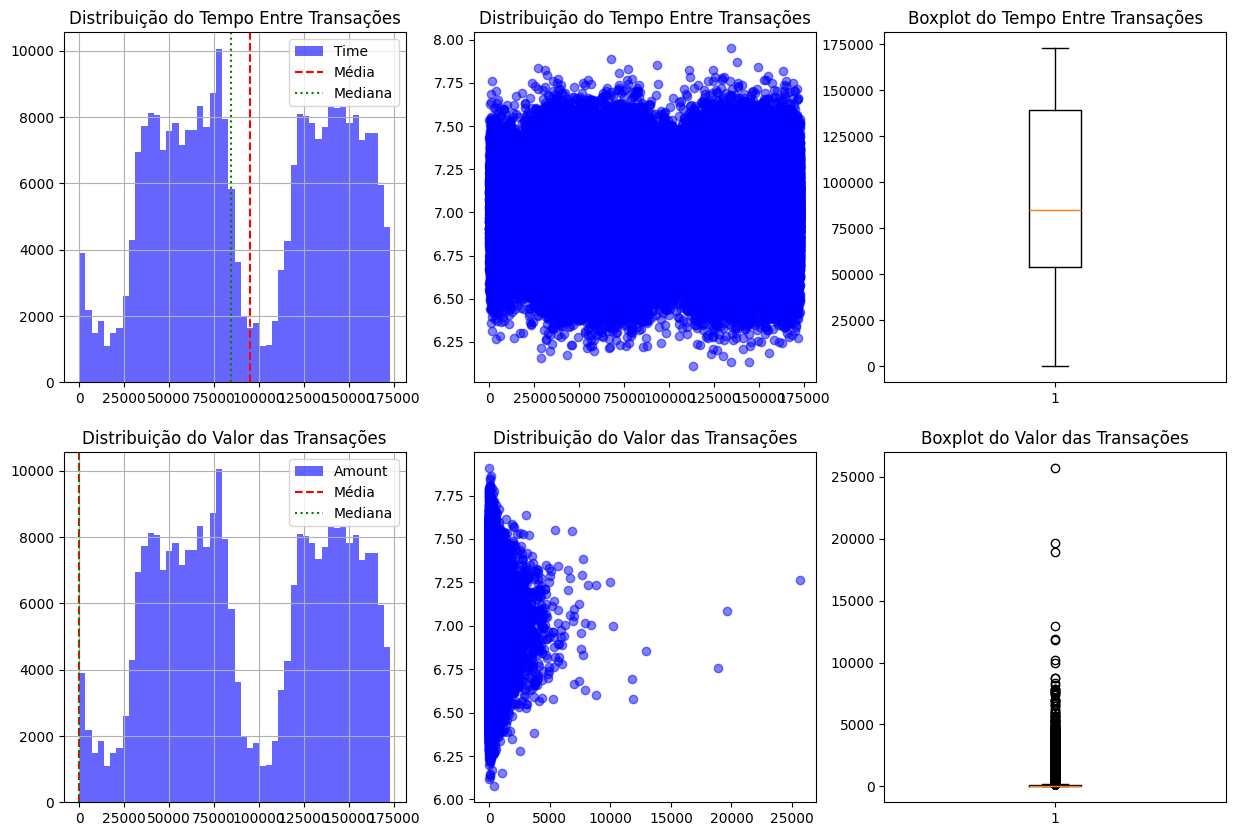

In [11]:
transition_time = creditcard['Time']
transition_amount = creditcard['Amount']

plt.figure(figsize=(15,10))

plt.subplot(2, 3, 1)
transition_time.hist(bins=50, label='Time', alpha=0.6, color = 'blue')
plt.axvline(np.mean(transition_time), ls='--', c='r', label="Média")
plt.axvline(np.median(transition_time), ls=':', c='g', label="Mediana")
plt.ylabel("")
plt.title("Distribuição do Tempo Entre Transações")
plt.legend()

plt.subplot(2, 3, 2)
plt.scatter(transition_time, np.random.normal(7, 0.2, size=transition_time.shape[0]), alpha=0.5, color = 'blue')
plt.ylabel("")
plt.title("Distribuição do Tempo Entre Transações")

plt.subplot(2, 3, 3)
plt.boxplot(transition_time)
plt.ylabel("")
plt.title("Boxplot do Tempo Entre Transações")

plt.subplot(2, 3, 4)
transition_time.hist(bins=50, label='Amount', alpha=0.6, color = 'blue')
plt.axvline(np.mean(transition_amount), ls='--', c='r', label="Média")
plt.axvline(np.median(transition_amount), ls=':', c='g', label="Mediana")
plt.ylabel("")
plt.title("Distribuição do Valor das Transações")
plt.legend()

plt.subplot(2, 3, 5)
plt.scatter(transition_amount, np.random.normal(7, 0.2, size=transition_amount.shape[0]), alpha=0.5, color = 'blue')
plt.ylabel("")
plt.title("Distribuição do Valor das Transações")

plt.subplot(2, 3, 6)
plt.boxplot(transition_amount)
plt.ylabel("")
plt.title("Boxplot do Valor das Transações")

C:\Users\Cliente\AppData\Local\Temp\ipykernel_3532\1674639192.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="Time", data=creditcard, palette=cores_por_class)
C:\Users\Cliente\AppData\Local\Temp\ipykernel_3532\1674639192.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="Amount", data=creditcard, palette=cores_por_class)


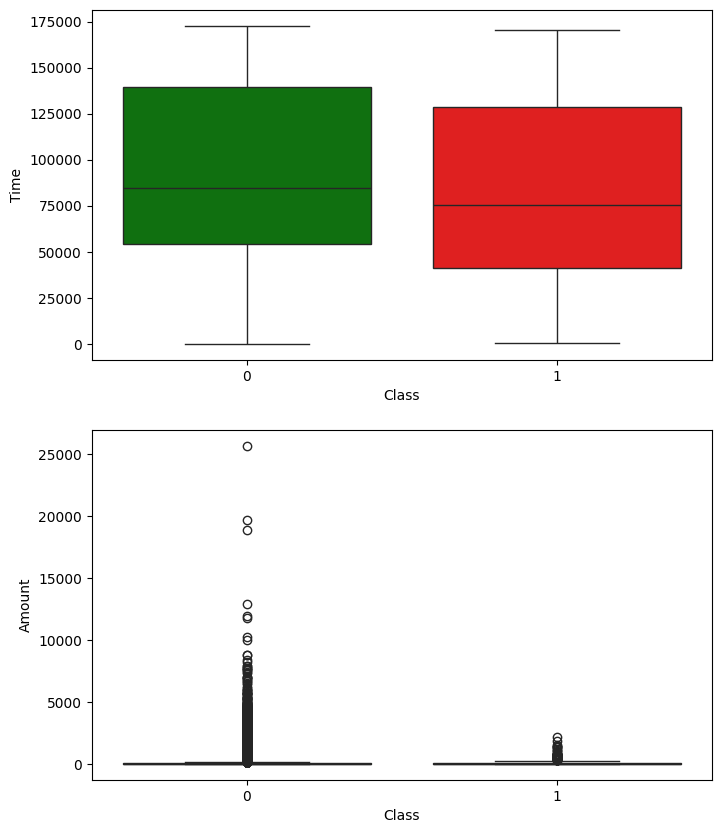

In [12]:
plt.figure(figsize=(8, 10))

cores_por_class = {"0": "green", "1": "red"}

plt.subplot(2, 1, 1)
sns.boxplot(x="Class", y="Time", data=creditcard, palette=cores_por_class)

plt.subplot(2, 1, 2)
sns.boxplot(x="Class", y="Amount", data=creditcard, palette=cores_por_class)

plt.show()

Não há presença de outliers no tempo e há em amount

#### Análise de Correlação

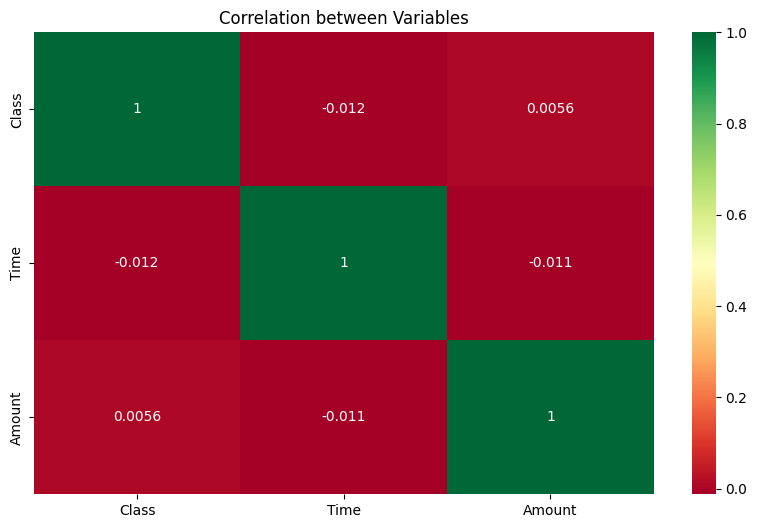

In [13]:
var = ['Class', 'Time', 'Amount']
corr_var = creditcard[var]

plt.figure(figsize=(10, 6))
sns.heatmap(corr_var.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

## Normalização

In [ ]:
rob_scaler = RobustScaler()

creditcard['amount_norm'] = rob_scaler.fit_transform(creditcard['Amount'].values.reshape(-1,1))
creditcard['time_norm'] = rob_scaler.fit_transform(creditcard['Time'].values.reshape(-1,1))

creditcard.head()

## Balanceamento